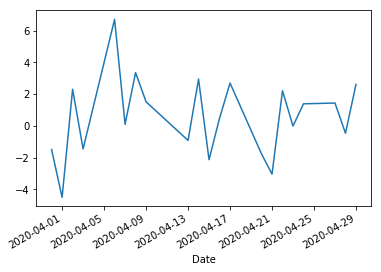

Iteration:      1,   Func. Count:      6,   Neg. LLF: 48.88164012605967
Iteration:      2,   Func. Count:     14,   Neg. LLF: 48.45889740856309
Iteration:      3,   Func. Count:     21,   Neg. LLF: 48.37251880882506
Iteration:      4,   Func. Count:     27,   Neg. LLF: 48.314423229890714
Iteration:      5,   Func. Count:     33,   Neg. LLF: 48.21319214019049
Iteration:      6,   Func. Count:     39,   Neg. LLF: 48.05387512412155
Iteration:      7,   Func. Count:     45,   Neg. LLF: 47.98872471139517
Iteration:      8,   Func. Count:     51,   Neg. LLF: 47.987969182008754
Iteration:      9,   Func. Count:     57,   Neg. LLF: 47.98795817791471
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 47.987958177887236
            Iterations: 9
            Function evaluations: 57
            Gradient evaluations: 9
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  Close   R-squared:            

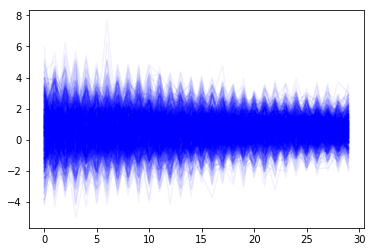

-0.7805533082133305


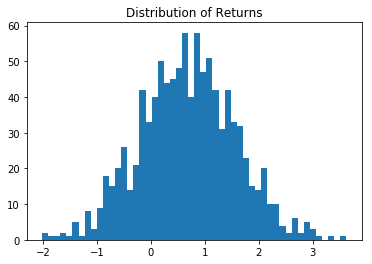

In [14]:
import datetime as dt
import sys

import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from arch import arch_model

import yfinance as yf
spy_df = yf.download('SPY', start='2020-03-30',end='2020-04-30',progress=False,auto_adjust=True)


returns = 100 * spy_df['Close'].pct_change().dropna()
returns.plot()
plt.show()

model=arch_model(returns, vol='Garch', p=1, o=0, q=1, dist='Normal')
results=model.fit()
print(results.summary())

forecasts = results.forecast(horizon=30, method='simulation', simulations=1000)
sims = forecasts.simulations

lines = plt.plot(sims.values[-1,:,:].T, color='blue', alpha=0.05)
lines[0].set_label('Simulated paths')
plt.show()

print(np.percentile(sims.values[-1,:,-1].T,5))
plt.hist(sims.values[-1, :,-1],bins=50)
plt.title('Distribution of Returns')
plt.show()

